In [42]:
import pandas as pd  
from datetime import datetime
import matplotlib.pyplot as plt  

In [38]:
df = pd.read_csv(r'D:\datascience\projects\Python-Projects\taxi_analysis\datasets\data_orders.csv')
df.columns = df.columns.str.strip()
df.head(5)

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN


In [39]:
df.dropna(subset=['m_order_eta'], inplace= True)
print(len(df))
df.head(5)

2814


,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
13,16:55:28,-0.950683,51.451368,538.0,3000583016613,4,1,188.0
14,00:59:26,-0.937006,51.448696,179.0,3000582566041,4,1,316.0


In [40]:
df['hour'] = df['order_datetime'].apply(lambda time: datetime.strptime(time, "%H:%M:%S").hour )
df.head(5)

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,hour
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,18
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,12
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0,13
13,16:55:28,-0.950683,51.451368,538.0,3000583016613,4,1,188.0,16
14,00:59:26,-0.937006,51.448696,179.0,3000582566041,4,1,316.0,0


In [41]:
df = df.groupby('hour')['m_order_eta'].mean().astype(int).reset_index(name='avg_eta')
df.head(10)


,hour,avg_eta
0,0,357
1,1,324
2,2,391
3,3,388
4,4,299
5,5,411
6,6,427
7,7,583
8,8,636
9,9,504


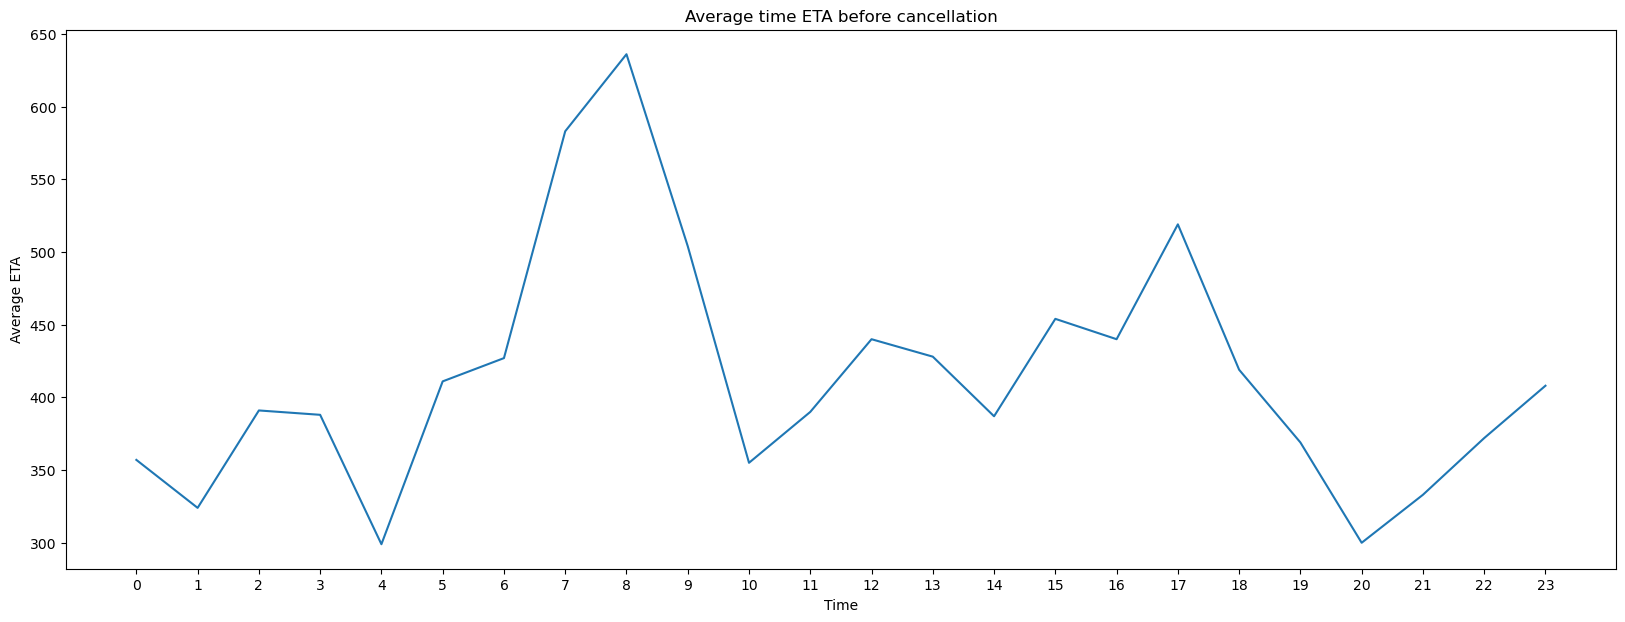

In [44]:
plt.figure(figsize= (20, 7))
plt.plot(df['hour'], df['avg_eta'])
plt.xticks(df['hour'])
plt.xlabel('Time')
plt.ylabel('Average ETA')
plt.title('Average time ETA before cancellation')
plt.show()